* A massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network (ANN).

* TensorFlow is a framework for creating machine learning models, including deep neural networks (DNNs).

* In this example, we'll use Tensorflow to create a simple neural network that classifies penguins into species based on the length and depth of their culmen (bill), their flipper length, and their body mass.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins_data.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

In [3]:
# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
217,49.8,16.8,23.0,57.00,1
98,33.1,16.1,17.8,29.00,0
24,38.8,17.2,18.0,38.00,0
216,45.8,14.2,21.9,47.00,1
62,37.6,17.0,18.5,36.00,0
162,40.9,13.7,21.4,46.50,1
232,49.1,14.5,21.2,46.25,1
256,47.3,13.8,21.6,47.25,1
285,51.3,19.9,19.8,37.00,2
290,45.9,17.1,19.0,35.75,2


In [4]:
penguins.shape

(1368, 5)

* The Species column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

In [5]:
penguin_classes = ['Adelle', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')

for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',
          penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.8 16.8 23.0 57.0 1 ] Gentoo
[ 34.6 17.2 18.9 32.0 0 ] Adelle
[ 50.5 15.9 22.2 55.5 1 ] Gentoo
[ 39.6 17.2 19.6 35.5 0 ] Adelle
[ 45.2 17.8 19.8 39.5 2 ] Chinstrap
[ 41.1 18.6 18.9 33.25 0 ] Adelle
[ 37.5 18.5 19.9 44.75 0 ] Adelle
[ 48.2 15.6 22.1 51.0 1 ] Gentoo
[ 46.8 14.3 21.5 48.5 1 ] Gentoo
[ 50.2 18.7 19.8 37.75 2 ] Chinstrap


* As it is common in a supervised learning problem, we'll split the dataset into a set of records with which we'll train the model, and a smaller set with which we'll validate the trained model.


In [6]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print (f'Training Set: {len(X_train)}\nTest Set: {len(X_test)}')
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(X_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957
Test Set: 411
Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelle)
[42.5 20.7 19.7 45. ] 0 (Adelle)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelle)
[37.8 17.1 18.6 33. ] 0 (Adelle)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelle)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelle)
[41.1  19.   18.2  34.25] 0 (Adelle)
[33.1 16.1 17.8 29. ] 0 (Adelle)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelle)


## Installing and Importing Tensorflow Libraries

`**Note:** Keras is an abstraction layer over the base TensorFlow API. In most common machine learning scenarios, you can use Keras to simplify your code.`

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.12.0
TensorFlow version: 2.12.0


## Prepare the data for Tensorflow

In [8]:
# Set the data types for float features

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Set data types for categorical data
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


# Define a Neural Network

In [9]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes),input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


# Train the model

In [10]:
# Hyper parameters for optimizer

learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10 observation in batches and using the test holdout dataset for validation

num_epochs = 50
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
96/96 [==============================] - 2s 6ms/step - loss: 5.3569 - accuracy: 0.4493 - val_loss: 3.2363 - val_accuracy: 0.4234
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 1.5352 - accuracy: 0.3302 - val_loss: 1.0149 - val_accuracy: 0.1582
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.9866 - accuracy: 0.2717 - val_loss: 0.9751 - val_accuracy: 0.3747
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.9199 - accuracy: 0.4504 - val_loss: 0.8950 - val_accuracy: 0.4623
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.6416 - val_loss: 0.8315 - val_accuracy: 0.7713
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.7907 - accuracy: 0.6959 - val_loss: 0.7659 - val_accuracy: 0.6691
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.7241 - val_loss: 0.7108 - val_accuracy: 0.7543
Epoch 8/50
96/96 [==

# Review Training and Validation Loss

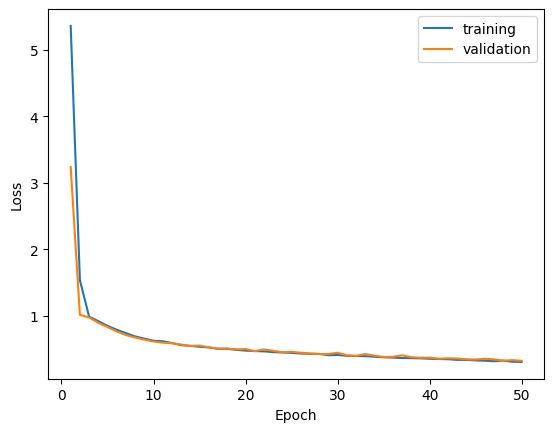

In [11]:
epochs_nums = range(1, num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history['val_loss']

plt.plot(epochs_nums, training_loss)
plt.plot(epochs_nums, validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc ='upper right')
plt.show()


# View the learned weights and biases

In [13]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[ 0.17193568  0.42648357 -0.09814101  0.4351917   0.44338676 -0.45717487
  -0.55364794 -0.50698113 -0.32003626 -0.14330834]
 [ 0.17651471  0.10139237  0.4599142   0.68736213 -0.37360936 -0.17658776
   0.485263   -0.04149026  0.62618613  0.6310867 ]
 [-0.5765198  -0.56747097  0.03571367  0.2536862   0.4409513   0.23177165
  -0.29495534  0.4256704   0.07074273 -0.33329913]
 [-0.07078379  0.00165142 -0.27581632 -0.65434784  0.27753836 -0.34545773
  -0.588046   -0.07544267 -0.35026973 -0.30300277]] 
Biases:
 [-0.08359233 -0.32167992  0.         -0.29764476  0.24597967  0.
  0.          0.          0.          0.        ]
------------
Weights:
 [[-0.32237098 -0.21817145  0.09534131 -0.27349982 -0.30168906  0.05074972
   0.35429782 -0.44508833  0.34828556  0.5267856 ]
 [ 0.3309376  -0.5317204  -0.30063468 -0.24308774  0.6633285  -0.16148561
  -0.1555786  -0.5091993   0.27535027 -0.1595208 ]
 [-0.53145874  0.01360416 -0.21855512 -0.08660427 -0.02668589 -0.163347
   0.4

# Evaluate Model Performance

13/13 [==============================] - 0s 3ms/step


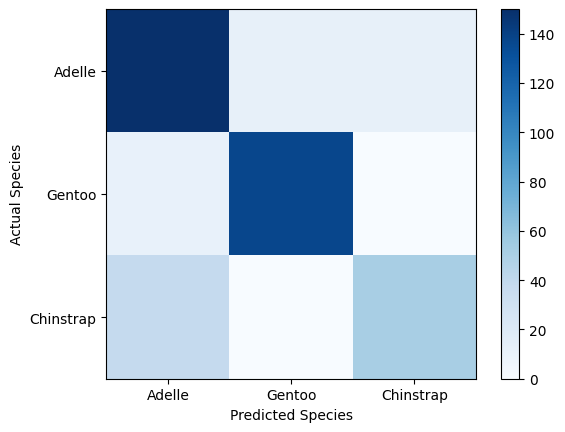

In [19]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn

from sklearn.metrics import confusion_matrix

class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()

tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=0)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()


# Save the trained model

In [20]:
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model # deletes the existing model variable

print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


# Use The Trained Model

In [21]:
# Load the saved model
model = models.load_model(modelFileName)

# Create a new array of features
X_new = np.array([[50.4,15.3,20,50]])
print('New Sample: {X_new}')

# Use the model to predict the class
class_probabilities = model.predict(X_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New Sample: {X_new}
1/1 [==============================] - 0s 62ms/step
Gentoo
